In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    ans = 1/(1 + np.exp(-z))
    return ans 

In [3]:
df = pd.read_csv('exam selection.csv')

Text(0.5, 1.0, 'Exam marks and data')

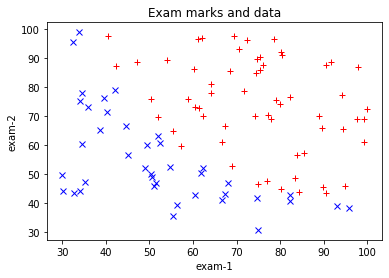

In [4]:
positive_data = df[df['selection'] == 1]
negative_data = df[df['selection'] == 0]
plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
plt.xlabel('exam-1')
plt.ylabel('exam-2')
#plt.legend('selected','not selected')
plt.title('Exam marks and data')

In [5]:
# Making input values : 
x1 = df['exam-1']
x2 = df['exam-2']
X = np.array([x1,x2])
# Making ouput : 
Y = np.array([df['selection']])
print(Y.shape)

(1, 100)


In [6]:
def Logistics(X,Y,iterations = 400,learning_rate = 0.001):
    # intializing weights and bias : 
    w = np.zeros((2,1))
    b = 0
    m = Y.shape[1] # number of examples
    dj = []
    for i in range(0,iterations + 1)  :
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            print('Cost after',i,'iterations :',cost)
    return w,b,dj

In [7]:
w,b,cost = Logistics(X,Y)
# we observe that it doesn't work for high learning rate !! so we try with normalizing the parameters 

Cost after 0 iterations : 0.6931471805599453
Cost after 100 iterations : 0.6293336119470755
Cost after 200 iterations : 0.6288469753165001
Cost after 300 iterations : 0.6283614052510145
Cost after 400 iterations : 0.6278766716892377


[30.05882245 99.8278578 ]


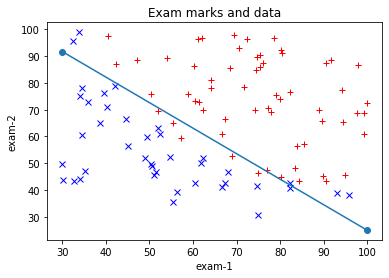

In [8]:
## plotting decision boundaries : 

def decision_boundary(df,X,Y,w,b):
    plt.figure()
    positive_data = df[df['selection'] == 1]
    negative_data = df[df['selection'] == 0]
    plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
    plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
    plt.xlabel('exam-1')
    plt.ylabel('exam-2')
    plt.title('Exam marks and data')
    
    # decisison boundary is plotted by computing z = 0 :
    
    # if number of parameters are only 2 :
    # then we can plot a straight line directly as :    
    if X.shape[0] <= 2 : 
        x = np.array([np.min(X[0]),np.max(X[0])])
        y = (-1/0.128)*(-15.4 + 0.122*x)
        print(x)
        plt.plot(x,y,'-o')
    plt.show()

decision_boundary(df,X,Y,w,b)

In [9]:
# trying a different approach with the input : 
input_X = X.T
output_Y = Y.T
def TLog(X,Y,iterations = 1000,learning_rate = 0.001):
    # intializing weights and bias : 
    w = np.zeros((2,1))
    b = 0
    m = Y.shape[0] # number of examples
    dj = []
    for i in range(0,iterations + 1)  :
        z = np.dot(X,w) + b # since input is now transposed; this should give the same results
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X.T,dz)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i % 100 == 0:
            print('Cost after',i,'iterations :',cost)
    return w,b,dj
a,b,c = TLog(input_X,output_Y) # No difference observed -_-

Cost after 0 iterations : 0.6931471805599453
Cost after 100 iterations : 0.6293336119470755
Cost after 200 iterations : 0.6288469753165001
Cost after 300 iterations : 0.6283614052510145
Cost after 400 iterations : 0.6278766716892377
Cost after 500 iterations : 0.6273927732365402
Cost after 600 iterations : 0.6269097085011375
Cost after 700 iterations : 0.6264274760916528
Cost after 800 iterations : 0.6259460746171297
Cost after 900 iterations : 0.6254655026870453
Cost after 1000 iterations : 0.6249857589113235


## Lets try using Keras : 


In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
x = input_X
y = output_Y
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,activation = 'sigmoid', input_shape = (2,))])
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics = ['accuracy'])
history = model.fit(x,y,epochs=1000)

Train on 100 samples
Epoch 1/1000
100/100 [==============================] - 1s 8ms/sample - loss: 26.5883 - accuracy: 0.6000
Epoch 2/1000
100/100 [==============================] - 0s 80us/sample - loss: 26.2648 - accuracy: 0.6000
Epoch 3/1000
100/100 [==============================] - 0s 80us/sample - loss: 25.8241 - accuracy: 0.6000
Epoch 4/1000
100/100 [==============================] - 0s 80us/sample - loss: 25.4788 - accuracy: 0.6000
Epoch 5/1000
100/100 [==============================] - 0s 160us/sample - loss: 25.1445 - accuracy: 0.6000
Epoch 6/1000
100/100 [==============================] - 0s 80us/sample - loss: 24.8079 - accuracy: 0.6000
Epoch 7/1000
100/100 [==============================] - 0s 0s/sample - loss: 24.4857 - accuracy: 0.6000
Epoch 8/1000
100/100 [==============================] - 0s 80us/sample - loss: 24.1038 - accuracy: 0.6000
Epoch 9/1000
100/100 [==============================] - 0s 160us/sample - loss: 23.7110 - accuracy: 0.6000
Epoch 10/1000
100/100 [===

100/100 [==============================] - 0s 80us/sample - loss: 1.8246 - accuracy: 0.6300
Epoch 78/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.8060 - accuracy: 0.6200
Epoch 79/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7939 - accuracy: 0.6200
Epoch 80/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7832 - accuracy: 0.6300
Epoch 81/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7720 - accuracy: 0.6200
Epoch 82/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7585 - accuracy: 0.6300
Epoch 83/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7432 - accuracy: 0.6300
Epoch 84/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7201 - accuracy: 0.6200
Epoch 85/1000
100/100 [==============================] - 0s 80us/sample - loss: 1.7078 - accuracy: 0.6100
Epoch 86/1000
100/100 [==============================] - 0s 

100/100 [==============================] - 0s 160us/sample - loss: 0.9474 - accuracy: 0.5800
Epoch 154/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.9259 - accuracy: 0.6200
Epoch 155/1000
100/100 [==============================] - 0s 110us/sample - loss: 0.9130 - accuracy: 0.6300
Epoch 156/1000
100/100 [==============================] - 0s 85us/sample - loss: 0.9082 - accuracy: 0.6300
Epoch 157/1000
100/100 [==============================] - 0s 105us/sample - loss: 0.9000 - accuracy: 0.6300
Epoch 158/1000
100/100 [==============================] - 0s 101us/sample - loss: 0.8930 - accuracy: 0.6400
Epoch 159/1000
100/100 [==============================] - 0s 105us/sample - loss: 0.8898 - accuracy: 0.6400
Epoch 160/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.8907 - accuracy: 0.6600
Epoch 161/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.8741 - accuracy: 0.6400
Epoch 162/1000
100/100 [=======================

100/100 [==============================] - 0s 80us/sample - loss: 0.6369 - accuracy: 0.6300
Epoch 230/1000
100/100 [==============================] - 0s 133us/sample - loss: 0.6375 - accuracy: 0.6300
Epoch 231/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6424 - accuracy: 0.6500
Epoch 232/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6344 - accuracy: 0.6100
Epoch 233/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6407 - accuracy: 0.6100
Epoch 234/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6492 - accuracy: 0.6000
Epoch 235/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6418 - accuracy: 0.6000
Epoch 236/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6469 - accuracy: 0.6000
Epoch 237/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6447 - accuracy: 0.6000
Epoch 238/1000
100/100 [==========================

100/100 [==============================] - 0s 84us/sample - loss: 0.6338 - accuracy: 0.6000
Epoch 306/1000
100/100 [==============================] - 0s 96us/sample - loss: 0.6327 - accuracy: 0.6000
Epoch 307/1000
100/100 [==============================] - 0s 96us/sample - loss: 0.6296 - accuracy: 0.6000
Epoch 308/1000
100/100 [==============================] - 0s 62us/sample - loss: 0.6359 - accuracy: 0.6000
Epoch 309/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6313 - accuracy: 0.6000
Epoch 310/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6328 - accuracy: 0.6000
Epoch 311/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6320 - accuracy: 0.6000
Epoch 312/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6303 - accuracy: 0.6000
Epoch 313/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6314 - accuracy: 0.6000
Epoch 314/1000
100/100 [===========================

100/100 [==============================] - 0s 80us/sample - loss: 0.6319 - accuracy: 0.6000
Epoch 381/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6343 - accuracy: 0.6000
Epoch 382/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6305 - accuracy: 0.6000
Epoch 383/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6327 - accuracy: 0.6000
Epoch 384/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6316 - accuracy: 0.6000
Epoch 385/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6514 - accuracy: 0.6400
Epoch 386/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6329 - accuracy: 0.6000
Epoch 387/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6332 - accuracy: 0.6000
Epoch 388/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6306 - accuracy: 0.6000
Epoch 389/1000
100/100 [===========================

100/100 [==============================] - 0s 80us/sample - loss: 0.6410 - accuracy: 0.6000
Epoch 457/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6328 - accuracy: 0.6000
Epoch 458/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6371 - accuracy: 0.6000
Epoch 459/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6296 - accuracy: 0.6000
Epoch 460/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6387 - accuracy: 0.6000
Epoch 461/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6301 - accuracy: 0.6000
Epoch 462/1000
100/100 [==============================] - 0s 91us/sample - loss: 0.6299 - accuracy: 0.6000
Epoch 463/1000
100/100 [==============================] - 0s 31us/sample - loss: 0.6303 - accuracy: 0.6000
Epoch 464/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6316 - accuracy: 0.6000
Epoch 465/1000
100/100 [============================

100/100 [==============================] - 0s 80us/sample - loss: 0.6311 - accuracy: 0.6000
Epoch 533/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6318 - accuracy: 0.6000
Epoch 534/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6334 - accuracy: 0.6000
Epoch 535/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6356 - accuracy: 0.6000
Epoch 536/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6304 - accuracy: 0.6000
Epoch 537/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6298 - accuracy: 0.6000
Epoch 538/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6302 - accuracy: 0.6000
Epoch 539/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6307 - accuracy: 0.6000
Epoch 540/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6300 - accuracy: 0.6000
Epoch 541/1000
100/100 [===========================

100/100 [==============================] - 0s 80us/sample - loss: 0.6377 - accuracy: 0.6000
Epoch 609/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6317 - accuracy: 0.6000
Epoch 610/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6287 - accuracy: 0.6000
Epoch 611/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6294 - accuracy: 0.6000
Epoch 612/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6387 - accuracy: 0.6100
Epoch 613/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6323 - accuracy: 0.6000
Epoch 614/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6319 - accuracy: 0.6000
Epoch 615/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6283 - accuracy: 0.6000
Epoch 616/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6300 - accuracy: 0.6000
Epoch 617/1000
100/100 [============================

100/100 [==============================] - 0s 80us/sample - loss: 0.6340 - accuracy: 0.6000
Epoch 685/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6319 - accuracy: 0.6000
Epoch 686/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6350 - accuracy: 0.6000
Epoch 687/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6306 - accuracy: 0.6000
Epoch 688/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6302 - accuracy: 0.6000
Epoch 689/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6324 - accuracy: 0.6000
Epoch 690/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6287 - accuracy: 0.6000
Epoch 691/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6292 - accuracy: 0.6000
Epoch 692/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6297 - accuracy: 0.6000
Epoch 693/1000
100/100 [============================

100/100 [==============================] - 0s 80us/sample - loss: 0.6323 - accuracy: 0.6000
Epoch 761/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6301 - accuracy: 0.6000
Epoch 762/1000
100/100 [==============================] - 0s 97us/sample - loss: 0.6361 - accuracy: 0.6000
Epoch 763/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6416 - accuracy: 0.6000
Epoch 764/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6303 - accuracy: 0.6000
Epoch 765/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6313 - accuracy: 0.6000
Epoch 766/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6292 - accuracy: 0.6000
Epoch 767/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6378 - accuracy: 0.6000
Epoch 768/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6612 - accuracy: 0.6300
Epoch 769/1000
100/100 [==========================

100/100 [==============================] - 0s 80us/sample - loss: 0.6315 - accuracy: 0.6000
Epoch 837/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6354 - accuracy: 0.6000
Epoch 838/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6349 - accuracy: 0.6000
Epoch 839/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6360 - accuracy: 0.6000
Epoch 840/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6310 - accuracy: 0.6000
Epoch 841/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6340 - accuracy: 0.6000
Epoch 842/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6282 - accuracy: 0.6000
Epoch 843/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6296 - accuracy: 0.6000
Epoch 844/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6388 - accuracy: 0.6000
Epoch 845/1000
100/100 [============================

100/100 [==============================] - 0s 80us/sample - loss: 0.6317 - accuracy: 0.6000
Epoch 913/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6285 - accuracy: 0.6000
Epoch 914/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6347 - accuracy: 0.6000
Epoch 915/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6281 - accuracy: 0.6000
Epoch 916/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6296 - accuracy: 0.6000
Epoch 917/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6279 - accuracy: 0.6000
Epoch 918/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6307 - accuracy: 0.6000
Epoch 919/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6279 - accuracy: 0.6000
Epoch 920/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6299 - accuracy: 0.6000
Epoch 921/1000
100/100 [============================

100/100 [==============================] - 0s 80us/sample - loss: 0.6289 - accuracy: 0.6000
Epoch 989/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6329 - accuracy: 0.6000
Epoch 990/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6374 - accuracy: 0.6000
Epoch 991/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6398 - accuracy: 0.6000
Epoch 992/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6289 - accuracy: 0.6000
Epoch 993/1000
100/100 [==============================] - 0s 160us/sample - loss: 0.6294 - accuracy: 0.6000
Epoch 994/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6326 - accuracy: 0.6000
Epoch 995/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6298 - accuracy: 0.6000
Epoch 996/1000
100/100 [==============================] - 0s 80us/sample - loss: 0.6332 - accuracy: 0.6000
Epoch 997/1000
100/100 [===========================

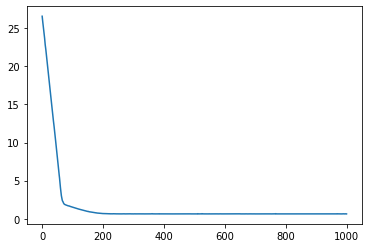

In [12]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)
plt.show()

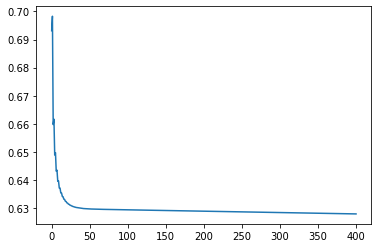

In [13]:
plt.plot(range(401),cost)

#### Thus Keras and basic model failed to reach the minimum without too many epochs

In [14]:
model.predict([[38,78]])

array([[0.624449]], dtype=float32)

In [15]:
print(sigmoid(np.dot([38,78],a) + b))

[0.60404167]


## Checking if multiple features help or not : 

In [16]:
X = np.array([X,X**2])
X = X.reshape(4,100)

In [17]:
def Logistics_multi(X,Y,iterations = 1000,learning_rate = 0.001):
    # intializing weights and bias : 
    w = np.zeros((4,1))
    b = 0
    m = Y.shape[1] # number of examples
    dj = []
    for i in range(0,iterations + 1)  :
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            print('Cost after',i,'iterations :',cost)
    return w,b,dj

In [18]:
w,b,cost = Logistics_multi(X,Y)

Cost after 0 iterations : 0.6931471805599453
Cost after 100 iterations : nan
Cost after 200 iterations : nan
Cost after 300 iterations : nan
Cost after 400 iterations : nan
Cost after 500 iterations : nan
Cost after 600 iterations : nan
Cost after 700 iterations : nan
Cost after 800 iterations : 252.0212039192459
Cost after 900 iterations : nan
Cost after 1000 iterations : nan


C:\Users\shaur\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shaur\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shaur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## looking at normalization :

In [19]:
check_x = x.T
print(np.mean(check_x[0]),np.mean(check_x[1]))
print(np.std(check_x[0]),np.std(check_x[1]))

65.64427405779999 66.2219980884
19.360686712341803 18.489635670443


In [20]:
# Making input values : 
x1 = df['exam-1']
x2 = df['exam-2']
X = np.array([x1,x2])
# Making ouput : 
Y = np.array([df['selection']])
def Logistics(X,Y,iterations = 1000,learning_rate = 0.1):
    # intializing weights and bias : 
    a0 = np.std(X[0])
    a1 = np.std(X[1]) 
    X[0] = X[0]/a0
    X[1] = X[1]/a1
    w = np.zeros((2,1))
    b = 0
    m = Y.shape[1] # number of examples
    dj = []
    for i in range(0,iterations + 1)  :
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            print('Cost after',i,'iterations :',cost)
    w[0] = w[0] / a0
    w[1] = w[1] / a1
    X[0] = X[0] * a0
    X[1] = X[1] * a1
    return w,b,dj

In [21]:
w,b,cost = Logistics(X,Y,iterations = 1000, learning_rate = 1)

Cost after 0 iterations : 0.6931471805599453
Cost after 100 iterations : 0.6738196115677262
Cost after 200 iterations : 0.4612807271930432
Cost after 300 iterations : 0.4905212432590753
Cost after 400 iterations : 0.37740275981433863
Cost after 500 iterations : 0.27257862627726737
Cost after 600 iterations : 0.22076887280417665
Cost after 700 iterations : 0.2149979626838834
Cost after 800 iterations : 0.21386743537487354
Cost after 900 iterations : 0.21287875992635166
Cost after 1000 iterations : 0.21200764709073866


In [22]:
print(w,b)
print(X)

[[0.15304893]
 [0.14760556]] -18.506757319055737
[[34.62365962 30.28671077 35.84740877 60.18259939 79.03273605 45.08327748
  61.10666454 75.02474557 76.0987867  84.43281996 95.86155507 75.01365839
  82.30705337 69.36458876 39.53833914 53.97105215 69.07014406 67.94685548
  70.66150955 76.97878373 67.37202755 89.67677575 50.53478829 34.21206098
  77.92409145 62.27101367 80.19018075 93.1143888  61.83020602 38.7858038
  61.37928945 85.40451939 52.10797973 52.04540477 40.23689374 54.63510555
  33.91550011 64.17698887 74.78925296 34.18364003 83.90239366 51.54772027
  94.44336777 82.36875376 51.04775177 62.22267576 77.19303493 97.77159928
  62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 34.52451385
  50.28649612 49.58667722 97.64563396 32.57720017 74.24869137 71.79646206
  75.39561147 35.28611282 56.2538175  30.05882245 44.66826172 66.56089447
  40.45755098 49.07256322 80.27957401 66.74671857 32.72283304 64.03932042
  72.34649423 60.45788574 58.84095622 99.8278578  47.26426911 50

[96.28624346 19.79676315]


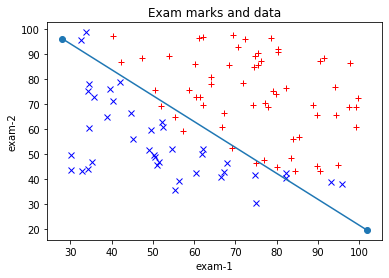

In [23]:
## plotting decision boundaries : 
plt.figure()
positive_data = df[df['selection'] == 1]
negative_data = df[df['selection'] == 0]
plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
plt.xlabel('exam-1')
plt.ylabel('exam-2')
plt.title('Exam marks and data')
    
    # decisison boundary is plotted by computing z = 0 :
    
    # if number of parameters are only 2 :
    # then we can plot a straight line directly as :    
if X.shape[0] <= 2 : 
    x = np.array([np.min(X[0])-2,np.max(X[0]) + 2])
    y = (-1/w[1])*(b + w[0]*x)
    print(y)
    plt.plot(x,y,'-o')
plt.show()

## Normalization with multiple features : 

In [24]:
X = np.array([X,X**2])
X = X.reshape(4,100)

In [25]:
def Logistics_multi(X,Y,iterations = 1000,learning_rate = 0.69):
    # intializing weights and bias : 
    a0 = np.std(X[0])
    a1 = np.std(X[1]) 
    a00 = np.std(X[2])
    a11 = np.std(X[3]) 
    
    X[0] /= a0
    X[1] /= a1
    X[2] /= a00
    X[3] /= a11
    
    w = np.zeros((4,1))
    b = 0
    m = Y.shape[1] # number of examples
    dj = []
    for i in range(0,iterations + 1)  :
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dj.append(cost)
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            print('Cost after',i,'iterations :',cost)
            
    w[0] /= a0
    w[1] /= a1
    w[2] /= a00
    w[3] /= a11
    
    X[0] = X[0] * a0
    X[1] = X[1] * a1
    X[2] = X[2] * a00
    X[3] = X[3] * a11
    return w,b,dj

In [45]:
w,b,cost = Logistics_multi(X,Y,10000,0.6)

Cost after 0 iterations : 0.6931471805599453
Cost after 100 iterations : 0.3747715564556125
Cost after 200 iterations : 0.3198716602345471
Cost after 300 iterations : 0.31478701053163705
Cost after 400 iterations : 0.31034090755854893
Cost after 500 iterations : 0.3061793651216344
Cost after 600 iterations : 0.3021849406769276
Cost after 700 iterations : 0.2983147170088935
Cost after 800 iterations : 0.2945514923330773
Cost after 900 iterations : 0.2908874115016539
Cost after 1000 iterations : 0.28731811636911625
Cost after 1100 iterations : 0.2838405776658827
Cost after 1200 iterations : 0.2804522768469349
Cost after 1300 iterations : 0.27715089647304525
Cost after 1400 iterations : 0.27393420464099427
Cost after 1500 iterations : 0.2708000135696922
Cost after 1600 iterations : 0.2677461662369942
Cost after 1700 iterations : 0.26477053335095746
Cost after 1800 iterations : 0.2618710139187143
Cost after 1900 iterations : 0.25904553690921595
Cost after 2000 iterations : 0.25629206311806

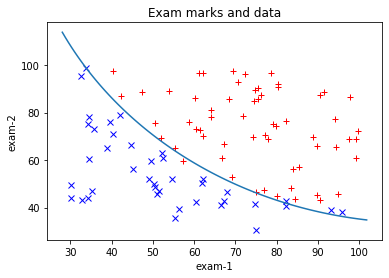

In [46]:
def quadratic_sol(a,b,c) :
    d = np.sqrt(b**2 - 4*a*c)
    ans = (-b + d)/(2*a)
    return ans
## plotting decision boundaries : 
plt.figure()
positive_data = df[df['selection'] == 1]
negative_data = df[df['selection'] == 0]
plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
plt.xlabel('exam-1')
plt.ylabel('exam-2')
plt.title('Exam marks and data')
    
    # decisison boundary is plotted by computing z = 0 :
    
    # if number of parameters are only 2 :
    # then we can plot a straight line directly as :    
if X.shape[0] <= 2 : 
    x = np.array([np.min(X[0])-2,np.max(X[0]) + 2])
    y = (-1/w[1])*(b + w[0]*x)
    print(y)
    plt.plot(x,y,'-o')
    plt.show()
else : 
    x_ = np.linspace(np.min(X[0])-2,np.max(X[0]) + 2,100) # 100 equally spaced exam1 data
    y_ = []
    coor_x , coor_y = [],[]
    for i in x_:
        z = quadratic_sol(w[3],w[1],(b + w[0]*i + w[2]*(i**2)))
        if z > 0 :
            coor_x.append(i)
            coor_y.append(z)
    #coor_x = np.array([coor_x])
    #coor_y = np.array(coor_y)
    
    plt.plot(coor_x,coor_y)
    plt.show()
#     WW = np.array([b,w[0],w[1],w[2],w[3],0])
#     u_vals = np.linspace(-1,1.5,50)
#     v_vals= np.linspace(-1,1.5,50)
#     z=np.zeros((len(u_vals),len(v_vals)))
#     for i in range(len(u_vals)):
#         for j in range(len(v_vals)):
#             z[i,j] =np.dot(mapFeaturePlot(u_vals[i],v_vals[j],2), WW)
# plt.contour(u_vals,v_vals,z.T,0)
# plt.xlabel("Exam 1 score")
# plt.ylabel("Exam 2 score")
# plt.legend(loc=0)

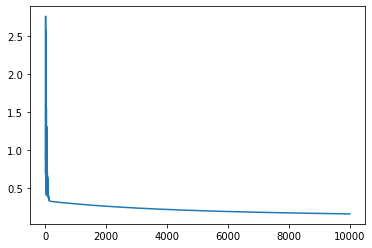

In [47]:
# checking the change in learning rate as a function of epochs : 
plt.plot(range(len(cost)),cost)

## So normalization helps !!